<a href="https://colab.research.google.com/github/mukul-B/nnunetExp/blob/main/HeartTrainingandTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nnunet --log check.txt

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.environ['nnUNet_preprocessed'] = "/content/nnunet_exp/nnUNet_preprocessed"
os.environ['RESULTS_FOLDER'] = "/content/drive/MyDrive"
# os.environ['RESULTS_FOLDER'] = "/media/fabian/nnUNet_trained_models"
os.environ['nnUNet_raw_data_base'] = "/content/nnunet_exp/nnUNet_raw_data_base"


In [4]:
!ls nnunet_exp
!rm -r nnunet_exp/nnUNet_preprocessed
!rm -r nnunet_exp/nnUNet_trained_models
!rm -r nnunet_exp/nnUNet_raw_data_base
!rm -r nnunet_exp

!mkdir nnunet_exp
!mkdir nnunet_exp/nnUNet_preprocessed
!mkdir nnunet_exp/nnUNet_trained_models
!mkdir nnunet_exp/nnUNet_raw_data_base

nnUNet_preprocessed  nnUNet_raw_data_base  nnUNet_trained_models


In [5]:
!bash /content/drive/MyDrive/preProcess.sh 2 Task02_Heart Task002_Heart



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

Traceback (most recent call last):
  File "/usr/local/bin/nnUNet_plan_and_preprocess", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/nnunet/experiment_planning/nnUNet_plan_and_preprocess.py", line 105, in main
    verify_dataset_integrity(join(nnUNet_raw_data, task_name))
  File "/usr/local/lib/python3.7/dist-packages/nnunet/preprocessing/sanity_checks.py", line 101, in verify_dataset_integrity
    assert isfile(join(folder, "dataset.json")), "There needs to be a dataset.json file in folder, folder=%s" % folder
AssertionError: There needs to be a dataset.json file in folder, folder=/conten

In [9]:
!cp /content/drive/MyDrive/nnUNet/2d/Task002_Heart/nnUNetTrainerV2__nnUNetPlansv2.1/fold_1/model_best.model.pkl /content/drive/MyDrive/nnUNet/2d/Task002_Heart/nnUNetTrainerV2__nnUNetPlansv2.1/fold_1/model_final_checkpoint.model.pkl
!cp /content/drive/MyDrive/nnUNet/2d/Task002_Heart/nnUNetTrainerV2__nnUNetPlansv2.1/fold_1/model_best.model /content/drive/MyDrive/nnUNet/2d/Task002_Heart/nnUNetTrainerV2__nnUNetPlansv2.1/fold_1/model_final_checkpoint.model

In [10]:
!nnUNet_install_pretrained_model_from_zip /content/drive/MyDrive/nnUNet/2d/Task002_Heart/nnUNetTrainerV2__nnUNetPlansv2.1/fold_1/model_final_checkpoint.model



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet



In [13]:
!nnUNet_determine_postprocessing -m 2d -t 2



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

Traceback (most recent call last):
  File "/usr/local/bin/nnUNet_determine_postprocessing", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/nnunet/postprocessing/consolidate_postprocessing_simple.py", line 56, in main
    consolidate_folds(folder, val)
  File "/usr/local/lib/python3.7/dist-packages/nnunet/postprocessing/consolidate_postprocessing.py", line 62, in consolidate_folds
    folds)
  File "/usr/local/lib/python3.7/dist-packages/nnunet/postprocessing/consolidate_postprocessing.py", line 33, in collect_cv_niftis
    [i for j, i in enumerate(folds) if not exist[j]])
RuntimeError: some

In [ ]:
!nnUNet_predict -i $nnUNet_raw_data_base/nnUNet_raw_data/Task002_Heart/imagesTs/ -o OUTPUT_DIRECTORY -f 1 -t 2 -m 2d

In [53]:
!rm -r /content/OUTPUT_DIRECTORY2
!cp -r /content/OUTPUT_DIRECTORY /content/OUTPUT_DIRECTORY2
!pwd
%cd /content/OUTPUT_DIRECTORY2
!pwd
!for f in *.nii.gz; do mv "$f" "${f%.nii.gz}"_0000.nii.gz; done;
%cd /content
!pwd

/content
/content/OUTPUT_DIRECTORY2
/content/OUTPUT_DIRECTORY2
/content
/content


In [55]:
!nnUNet_evaluate_folder -ref $nnUNet_raw_data_base/nnUNet_raw_data/Task002_Heart/imagesTs/ -pred /content/OUTPUT_DIRECTORY2 -l 1 2



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

/usr/local/lib/python3.7/dist-packages/nnunet/evaluation/evaluator.py:381: RuntimeWarning: Mean of empty slice
  all_scores["mean"][label][score] = float(np.nanmean(all_scores["mean"][label][score]))
OrderedDict([('all', [OrderedDict([('1', OrderedDict([('Accuracy', 0.9884751041666666), ('Dice', 0.0), ('False Discovery Rate', 1.0), ('False Negative Rate', 1.0), ('False Omission Rate', 0.003747623986305314), ('False Positive Rate', 0.00783566365922228), ('Jaccard', 0.0), ('Negative Predictive Value', 0.9962523760136947), ('Precision', 0.0), ('Recall', 0.0), ('Total Positives Reference', 107089), ('Total Positives Test', 224828), ('

110
0


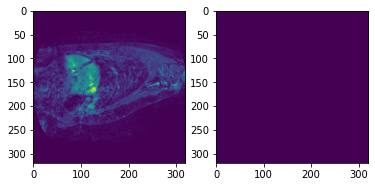

1


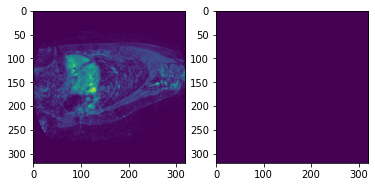

2


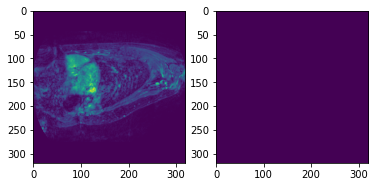

3


4


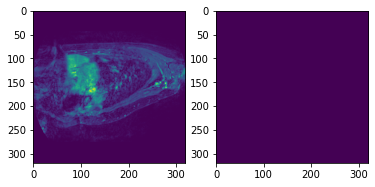

5


6


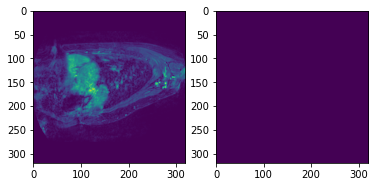

7


8


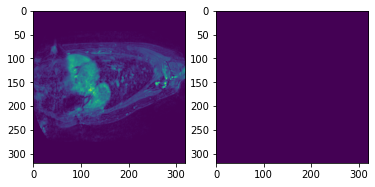

9


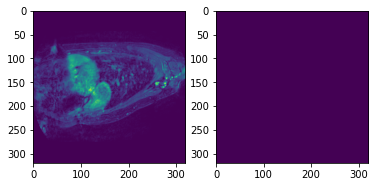

10


11


12


13


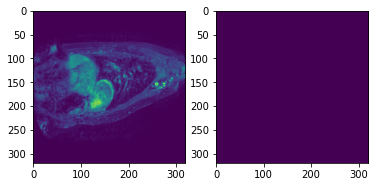

14


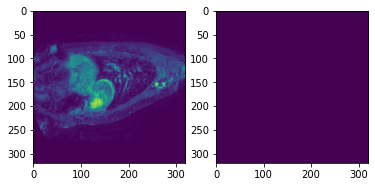

15


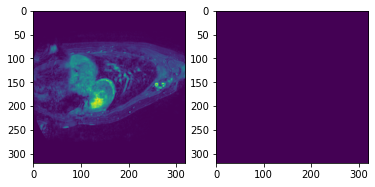

16


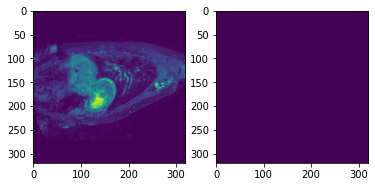

17


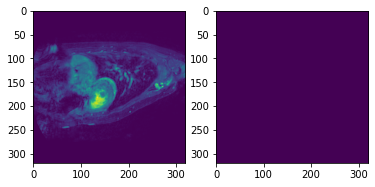

18


19


20


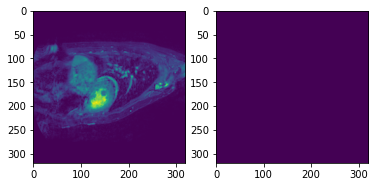

21


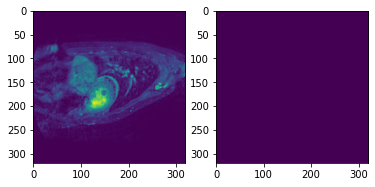

22


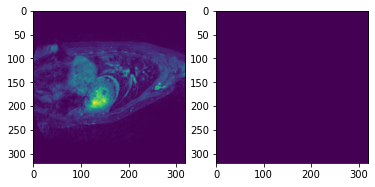

23


24


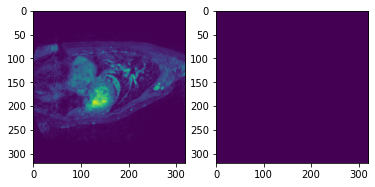

25


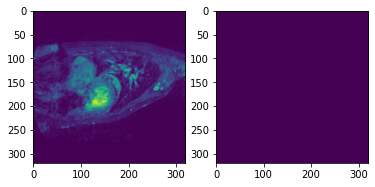

26


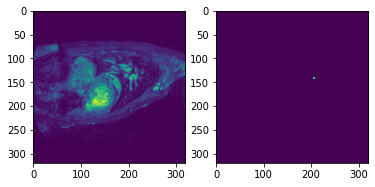

27


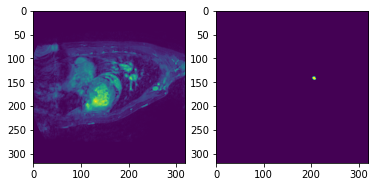

28


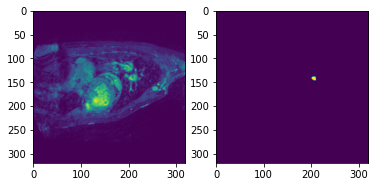

29


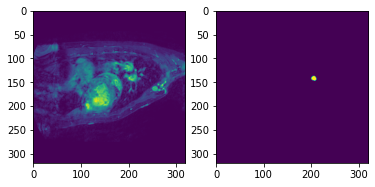

30


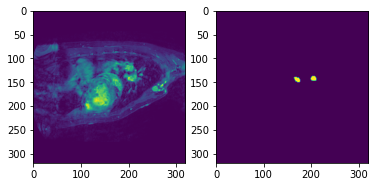

31


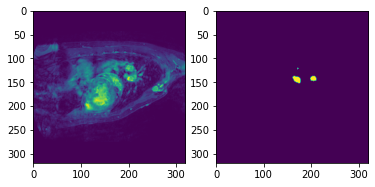

32


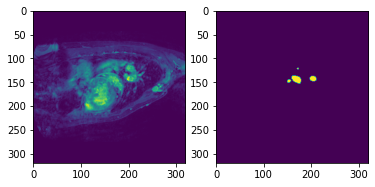

33


34


35


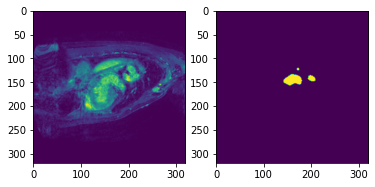

36


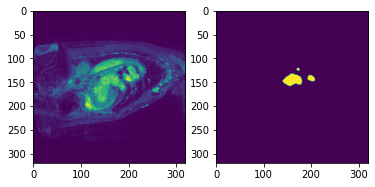

37


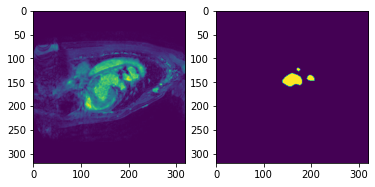

38


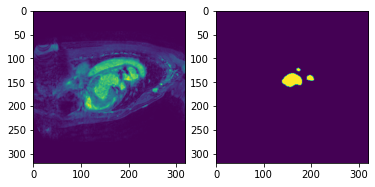

39


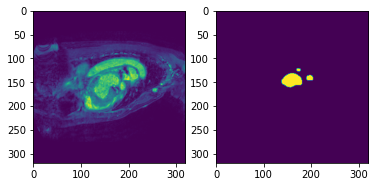

40


41


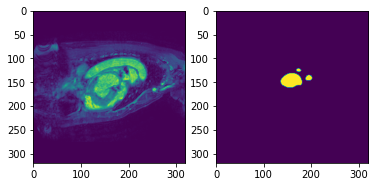

42


43


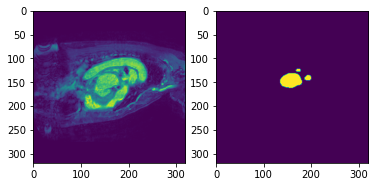

44


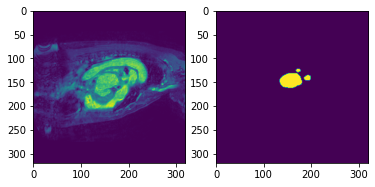

45


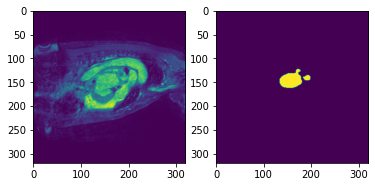

46


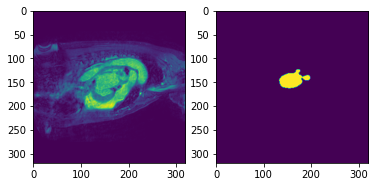

47


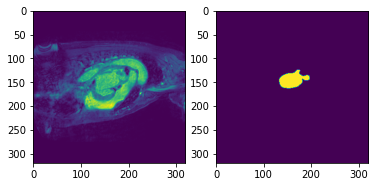

48


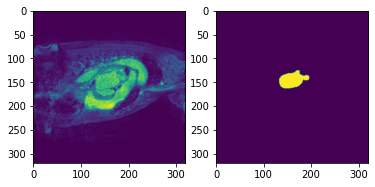

49


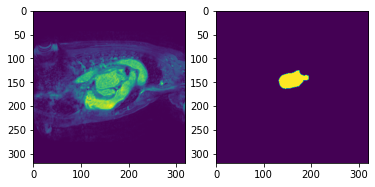

50


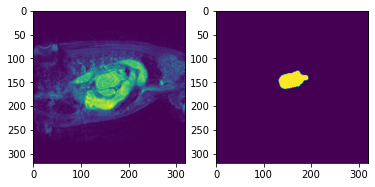

51


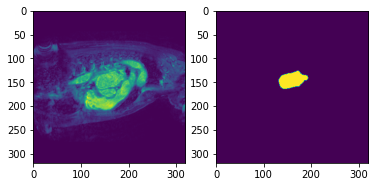

52


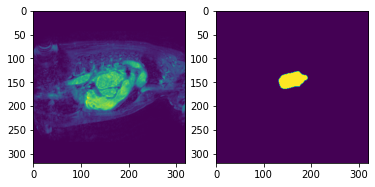

53


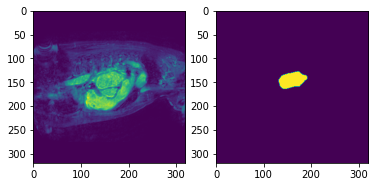

54


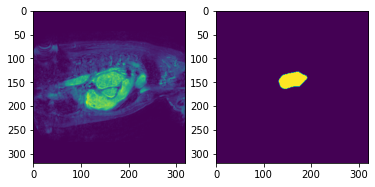

55


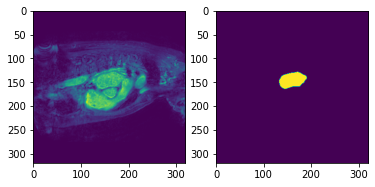

56


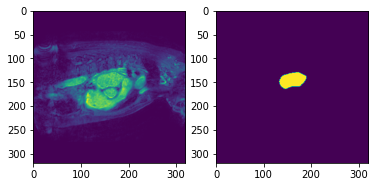

57


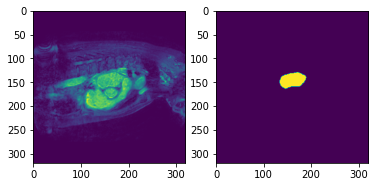

58


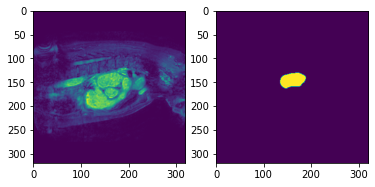

59


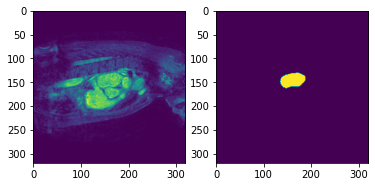

60


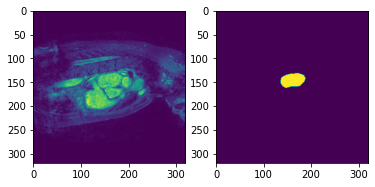

61


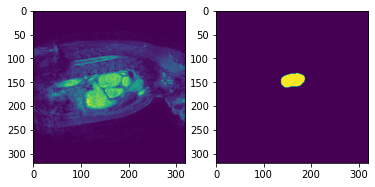

62


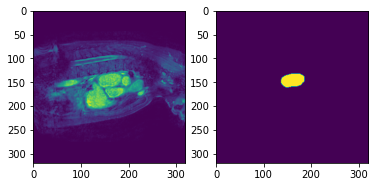

63


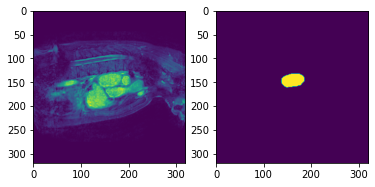

64


65


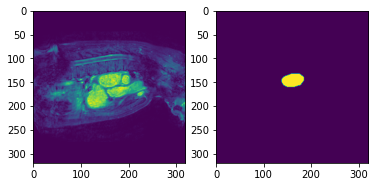

66


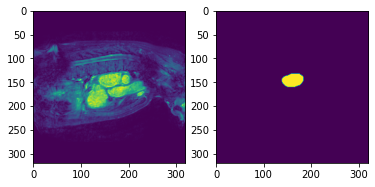

67


68


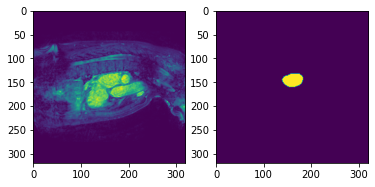

69


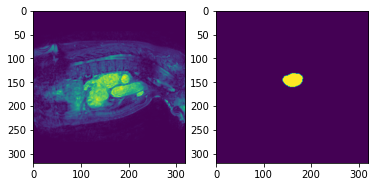

70


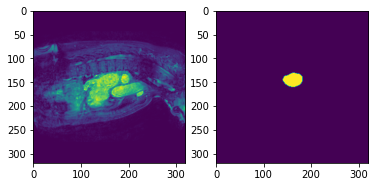

71


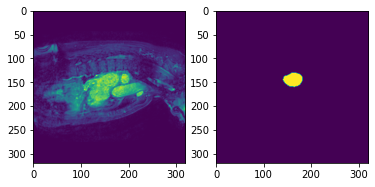

72


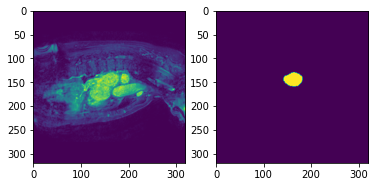

73


74


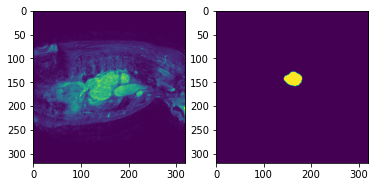

75


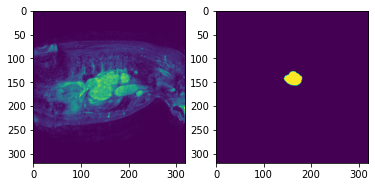

76


77


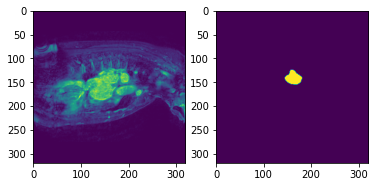

78


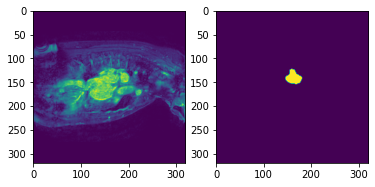

79


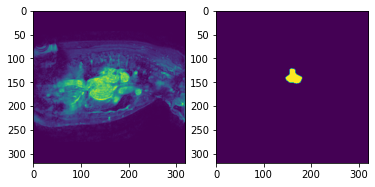

80


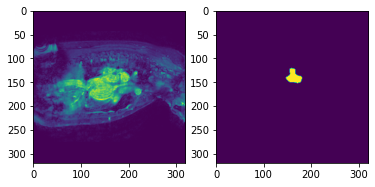

81


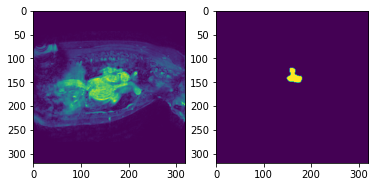

82


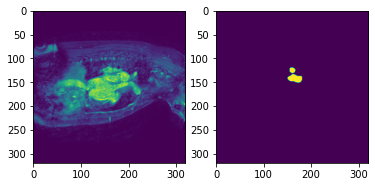

83


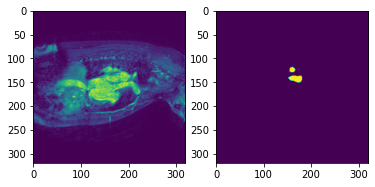

84


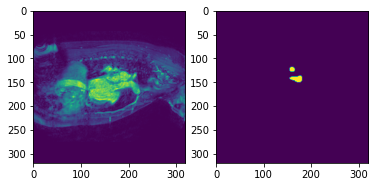

85


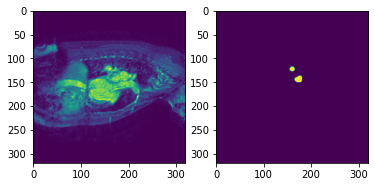

86


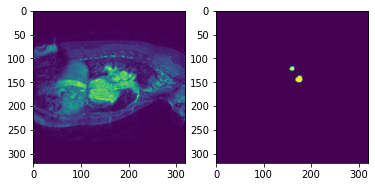

87


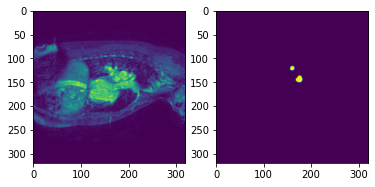

88


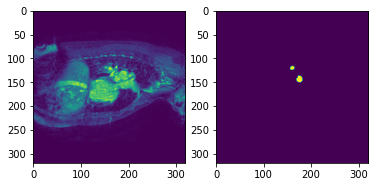

89


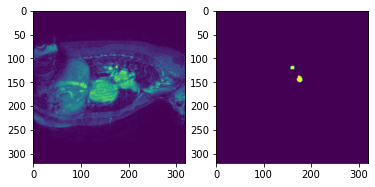

90


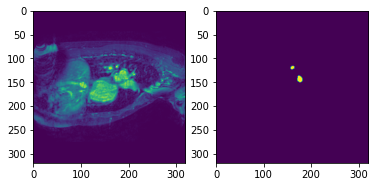

91


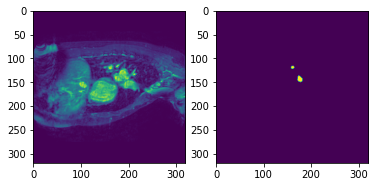

92


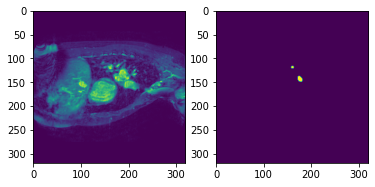

93


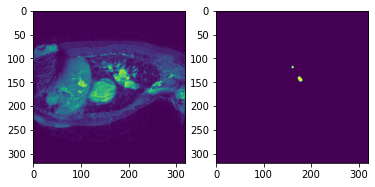

94


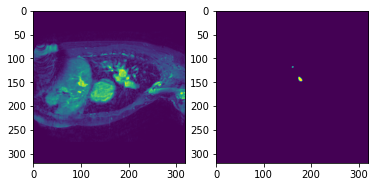

95


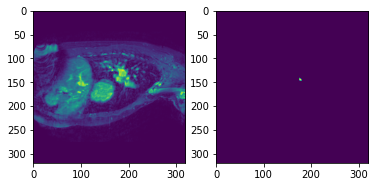

96


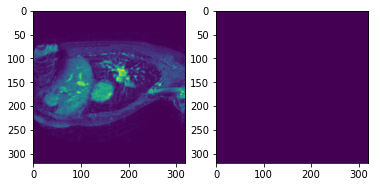

97


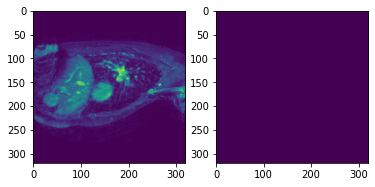

98


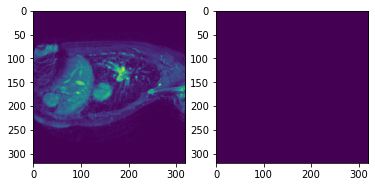

99


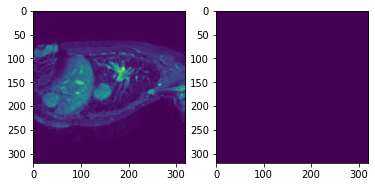

100


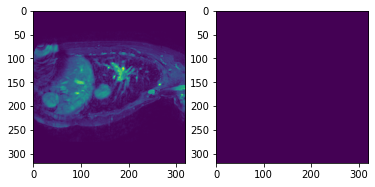

101


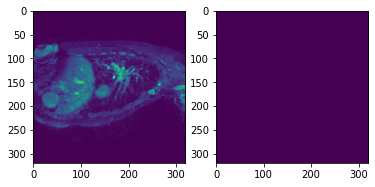

102


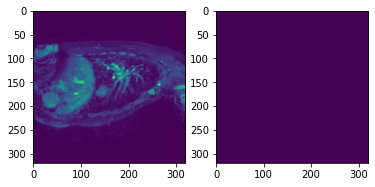

103


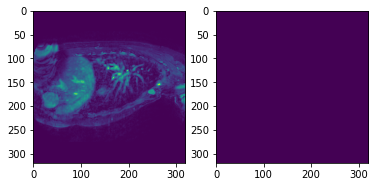

104


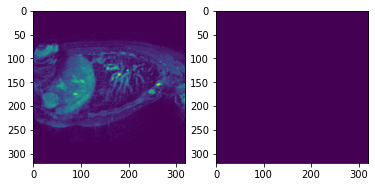

105


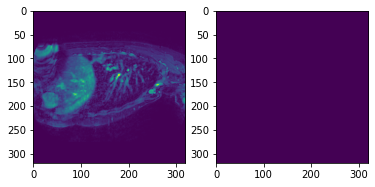

106


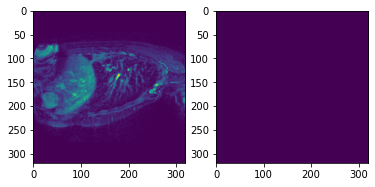

107


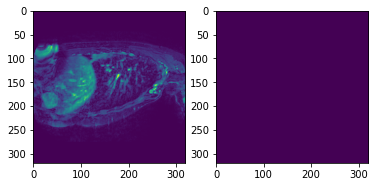

108


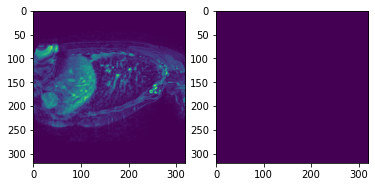

In [40]:
import os
import nibabel as nib
from nibabel.testing import data_path
import numpy as np
import matplotlib.pyplot as plt

test_load = nib.load('/content/nnunet_exp/nnUNet_raw_data_base/nnUNet_raw_data/Task002_Heart/imagesTr/la_004_0000.nii.gz').get_fdata()
test_seg_load = nib.load('/content/nnunet_exp/nnUNet_raw_data_base/nnUNet_raw_data/Task002_Heart/labelsTr/la_004.nii.gz').get_fdata()

# test_load = nib.load('/content/nnunet_exp/nnUNet_raw_data_base/nnUNet_raw_data/Task002_Heart/imagesTs/la_001_0000.nii.gz').get_fdata()
# test_seg_load = nib.load('/content/OUTPUT_DIRECTORY/la_001.nii.gz').get_fdata()
# test_load = nib.load('/content/OUTPUT_DIRECTORY/avg152T1_LR_nifti.nii.gz').get_fdata()
print(test_load.shape[2])
# test=np.squeeze(test_load)
for i in range(test_load.shape[2]-1):
  print(i)
  test = test_load[:,:,i]
  test_seg = test_seg_load[:,:,i]
  f, axarr = plt.subplots(1,2)
  axarr[0].imshow(test)
  axarr[1].imshow(test_seg)
  # plt.imshow(test)
  # plt.imshow(test_seg)
  plt.show()

In [ ]:
!nnUNet_train 2d nnUNetTrainerV2 Task002_Heart 1